In [1]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from rdflimeConfig import movieLocation

In [2]:
# Read movie dataset
#movieTrain = pd.read_csv(os.path.join(movieLocation, "train_fixed.csv"), sep='\t')
#movieTest = pd.read_csv(os.path.join(movieLocation, "test_fixed.csv"), sep='\t')
#movieFull = pd.concat(objs=[movieTrain, movieTest]).reset_index(drop=True)
movieFull = pd.read_csv(os.path.join(movieLocation, "movies.tsv"), sep="\t")

print(f"""
Metacritic-Movies dataset loaded.
Train samples: {len(movieTrain)} 
Test samples: {len(movieTest)}
Total samples: {len(movieFull)}
""")

movieFull


Metacritic-Movies dataset loaded.
Train samples: 1600 
Test samples: 400
Total samples: 2000



,Movie,Release date,DBpedia_URI,Label,id,rating
0,Best Kept Secret,9/6/2013 0:00,http://dbpedia.org/resource/Best_Kept_Secret_(...,good,1,100.0
1,The Godfather,3/11/1972 0:00,http://dbpedia.org/resource/The_Godfather,good,2,100.0
2,Army of Shadows,4/28/2006 0:00,http://dbpedia.org/resource/Army_of_Shadows,good,3,99.0
3,Hoop Dreams,10/14/1994 0:00,http://dbpedia.org/resource/Hoop_Dreams,good,4,98.0
4,Pan's Labyrinth,12/29/2006 0:00,http://dbpedia.org/resource/Pan's_Labyrinth,good,5,98.0
...,...,...,...,...,...,...
1995,Freddy Got Fingered,4/20/2001 0:00,http://dbpedia.org/resource/Freddy_Got_Fingered,bad,1996,13.0
1996,Strange Wilderness,2/1/2008 0:00,http://dbpedia.org/resource/Strange_Wilderness,bad,1997,12.0
1997,Dirty Love,9/23/2005 0:00,http://dbpedia.org/resource/Dirty_Love_(film),bad,1998,9.0
1998,The Tortured,6/15/2012 0:00,http://dbpedia.org/resource/The_Tortured,bad,1999,9.0


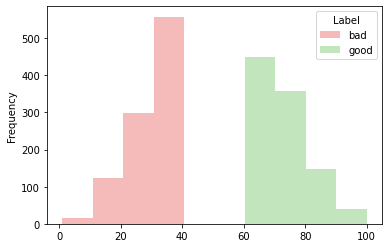

In [3]:
# Check rating distribution using histogram
_ratingHist = movieFull.copy()
_ratingHist.pivot(columns="Label", values="rating").plot.hist(color=["#F4BBBA", "#C3E5BD"])
plt.show()

# Findings:
# All movies with rating <= 40 marked bad
# All movies with rating >= 60 marked good
# No movies with rating 40-60 contained

# Future Work: 
# Check for test / train individually

In [4]:
# Check movies without rating
movieFull[pd.isna(movieFull.rating)]

# Findings:
# 8 movies, 4 good and 4 bad, have no rating

,Movie,Release date,DBpedia_URI,Label,id,rating
496,Alice et Martin,7/21/2000 0:00,http://dbpedia.org/resource/Alice_and_Martin,good,497,NaN
679,Alien: Resurrection,11/26/1997 0:00,http://dbpedia.org/resource/Alien:_Resurrection,good,680,NaN
721,All the Right Moves,10/21/1983 0:00,http://dbpedia.org/resource/All_the_Right_Move...,good,722,NaN
802,Aftershock,5/10/2013 0:00,http://dbpedia.org/resource/Aftershock_(2012_f...,bad,803,NaN
1071,21 and Over,3/1/2013 0:00,http://dbpedia.org/resource/21_&_Over_(film),bad,1072,NaN
1175,As Luck Would Have It,2/1/2013 0:00,http://dbpedia.org/resource/As_Luck_Would_Have...,bad,1176,NaN
1639,Bad Education,11/19/2004 0:00,http://dbpedia.org/resource/Bad_Education_(film),good,1640,NaN
1894,Bandido,12/10/2004 0:00,http://dbpedia.org/resource/Bandido_(2004_film),bad,1895,NaN


In [5]:
len(movieFull)
len(movieFull[movieFull.rating <= 40])
len(movieFull[movieFull.rating >= 50])

996